In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D #Used to plot in a 3D place
%matplotlib notebook

In [3]:
X = np.matrix([[1,1000,10],[1,2000,30],[1,4500,60],[1,5000,80]]) #Using a toy dataset with 2 features x1 and x2
#x1 has values 2000,4500...
#x2 has values 10,30,...
Y = np.matrix([[10],[15],[30],[50]])
Y
#What np.matrix does is that when you define a list as np.matrix, it pre-calculates the inverse and transpose of that matrix
#and stores the values which can be called as X.I for inverse and X.T for transpose

matrix([[10],
        [15],
        [30],
        [50]])

In [5]:
XT = X.T #X Transpose

In [6]:
XTX_inv = np.dot(XT,X).I #inverse of XTranspose.X

In [8]:
B = np.dot(XTX_inv , np.dot(XT,Y))#Inverse(XTX).XT.Y, we did this formula with derivation in class
#It is the formula to determine the bias and weights, here stored in matrix B (Theta) (Theta0,Theta1,...)

In [10]:
B #First value is bias rest all are weights

matrix([[ 4.   ],
        [-0.008],
        [ 1.05 ]])

In [11]:
y_hat = np.dot(X,B) #Yhat = X.B was the formula for predicted Y, we started off our derivation with this formula
#Since we wanted error to be 0, we equated Y = Yhat

In [12]:
y_hat

matrix([[ 6.5],
        [19.5],
        [31. ],
        [48. ]])

In [14]:
epsilon = Y-y_hat #Epsilon is used to denote error
epsilon

matrix([[ 3.5],
        [-4.5],
        [-1. ],
        [ 2. ]])

In [15]:
epsilon_T = epsilon.T

In [16]:
SSR = np.dot(epsilon_T,epsilon) #if you want sum of squared error use this formula

In [17]:
SSR

matrix([[37.5]])

In [18]:
eps = np.sqrt(SSR) #This gives underroot(SSR)

In [19]:
eps

matrix([[6.12372436]])

In [21]:
yhat = np.dot([[1,10000,160]],B) #Prediction for single point
yhat

matrix([[92.]])

<IPython.core.display.Javascript object>


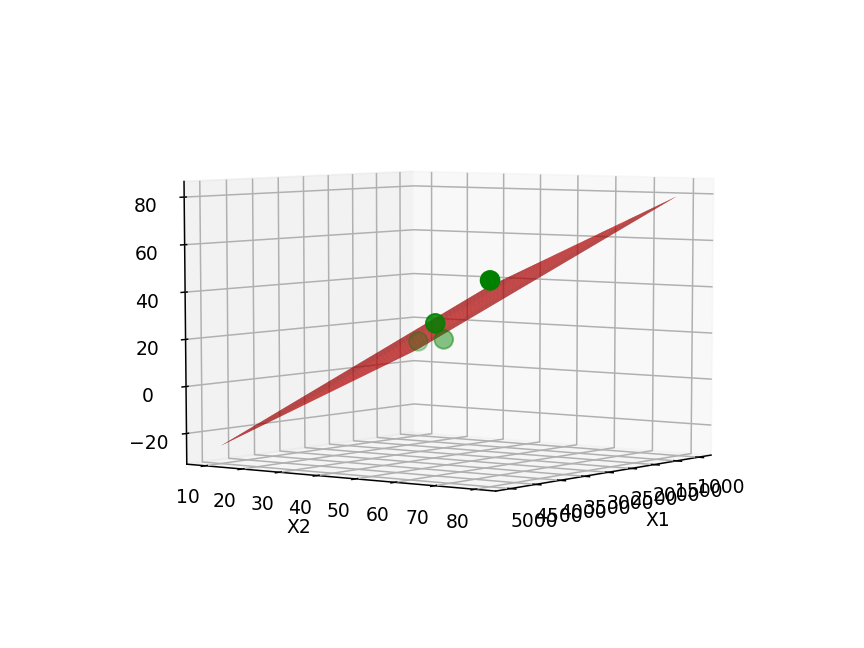

In [22]:
#Taken from mpl_toolkit documentation 
plt3d = plt.figure().gca(projection = '3d')
X1 = np.array(X[:,1]) #Array of X1 features
X2 = np.array(X[:,2]) #Array of X2 features
xx , yy = np.meshgrid(range(min(X1)[0],max(X1)[0]), range(min(X2)[0],max(X2)[0])) #Creates a meshgrid in 3D
plt3d.scatter(np.array(X[:,1]),np.array(X[:,2]),np.array(Y[:,0]),color = 'g',s=100) #Scattering of points (X1,X2,Y)
plt3d.plot_surface(xx,yy,np.array(B[0,0]+B[1,0]*xx+B[2,0]*yy),color = 'r') #Plots the plane formed in 3D space 
#Plane is formed due to performing multilinear regression on 2 features, performing on 3 or more features 
#results in hyperplane, 1 feature results in line (This was discussed briefly in class)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


In [23]:
#We have now created functions to turn any dataset into aur matrix format so that we can apply our equations on it
def make_X_mat(dataset):
    X = []
    for i in range(len(dataset)):
        X.append([1])
        X[i]+=(dataset[i])
    return np.matrix(X)

In [24]:
#Calculates weights and bias matrix for given input
def get_Beta(X,Y):
    XT = X.T
    XTX_inv = np.dot(XT,X).I
    return np.dot(XTX_inv , np.dot(XT,Y))

In [25]:
#Gives prediction for given featre matrix
def predict(X,B):
    return(np.dot(X,B))

In [26]:
X = np.array([1,2,3])

In [41]:
#We performed all the operations defined above on our dataset and retrieved a weights and bias matrix theta for it
df = pd.read_csv('bike sharing hour.csv')
list(df)
df.drop(['dteday'],1,inplace = True)
df.drop(['instant'],1,inplace = True)
full_data = df.astype(float).values.tolist()

In [42]:
Xdat = df.drop(['cnt'],1).astype(float).values.tolist()

In [43]:
Y = np.matrix(full_data)[:,-1]

In [44]:
X = make_X_mat(Xdat)

In [45]:
print(X)

[[ 1.      1.      0.     ...  0.      3.     13.    ]
 [ 1.      1.      0.     ...  0.      8.     32.    ]
 [ 1.      1.      0.     ...  0.      5.     27.    ]
 ...
 [ 1.      1.      1.     ...  0.1642  7.     83.    ]
 [ 1.      1.      1.     ...  0.1343 13.     48.    ]
 [ 1.      1.      1.     ...  0.1343 12.     37.    ]]


In [46]:
B =get_Beta(X,Y)

In [48]:
B #theta
#as was discussed all weights and even the bias becomes negligible except the weight for the last 2 features
#This means that only the last 2 features are really required to calculate the predicted Y

matrix([[ 2.38742359e-11],
        [-1.56106239e-11],
        [ 1.00897068e-11],
        [ 3.34487993e-12],
        [-9.59232693e-14],
        [-9.03810360e-12],
        [-3.69482223e-13],
        [-2.89901436e-12],
        [ 4.26325641e-13],
        [ 3.36513040e-11],
        [-4.45652404e-11],
        [-6.59383659e-12],
        [-7.27595761e-12],
        [ 1.00000000e+00],
        [ 1.00000000e+00]])

In [49]:
yhat = predict(X,B)

In [50]:
X

matrix([[ 1.    ,  1.    ,  0.    , ...,  0.    ,  3.    , 13.    ],
        [ 1.    ,  1.    ,  0.    , ...,  0.    ,  8.    , 32.    ],
        [ 1.    ,  1.    ,  0.    , ...,  0.    ,  5.    , 27.    ],
        ...,
        [ 1.    ,  1.    ,  1.    , ...,  0.1642,  7.    , 83.    ],
        [ 1.    ,  1.    ,  1.    , ...,  0.1343, 13.    , 48.    ],
        [ 1.    ,  1.    ,  1.    , ...,  0.1343, 12.    , 37.    ]])

In [51]:
Y

matrix([[16.],
        [40.],
        [32.],
        ...,
        [90.],
        [61.],
        [49.]])

In [52]:
print(Y)
yhat

[[16.]
 [40.]
 [32.]
 ...
 [90.]
 [61.]
 [49.]]


matrix([[16.],
        [40.],
        [32.],
        ...,
        [90.],
        [61.],
        [49.]])

In [53]:
Y-yhat

matrix([[ 2.70006240e-13],
        [ 2.91322522e-13],
        [ 3.83693077e-13],
        ...,
        [-4.58157956e-11],
        [-4.54818405e-11],
        [-4.47855086e-11]])

In [54]:
eps = Y-yhat

<IPython.core.display.Javascript object>


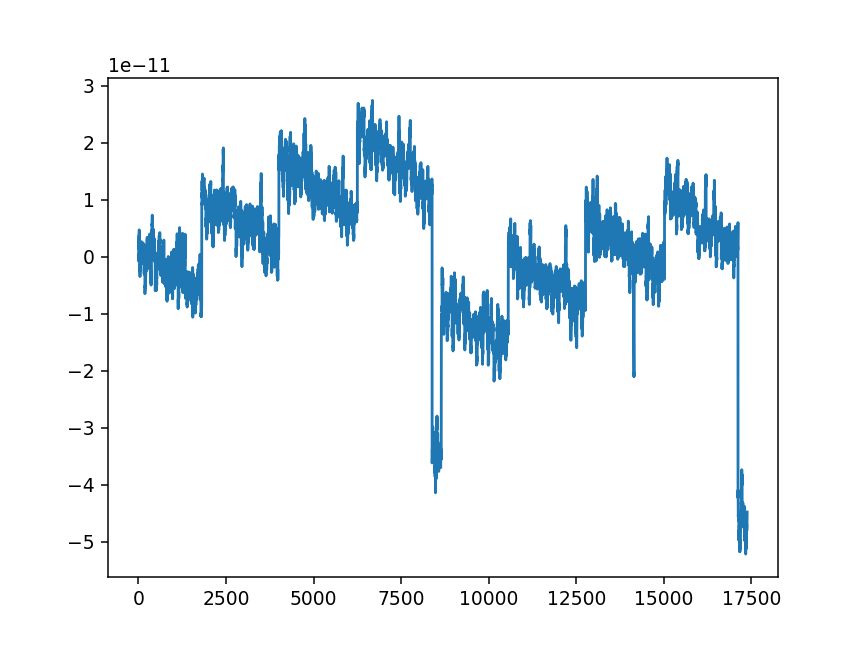

In [55]:
#Here we have plotted error on a number line for point 1 to the last point in the dataset
#You can also see that the error is in range of 1e-11 which is really really small
plt1 = plt.figure()
plt.plot(range(1,len(Xdat)+1),np.array(eps))
plt.show()